# Playing Around
General experimentation with simulations

In [1]:
# Add Code Directory (TEMPORY FIX)
import sys
sys.path.append('/home/jhrag/Code')

In [2]:
import numpy as np
from NI_simulation.modules import ni_sim
from scipy import signal
from matplotlib import pyplot as plt
from scipy.io import wavfile
import scipy.io

%load_ext autoreload
%autoreload 2

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='Distance (m)', ylabel='Distance (m)'>)

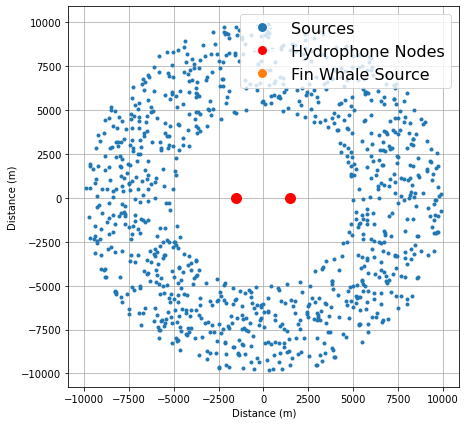

In [28]:
sources = ni_sim.source_distribution2D().distant_uniform(5000, 10000, 1000)
env = ni_sim.environment(sources, time_length = 900)
env.plot_env()

In [29]:
%%time
_ = env.get_signals()

CPU times: user 582 ms, sys: 585 ms, total: 1.17 s
Wall time: 2min 11s


In [30]:
%%time
nccf = env.correlate()
t_nccf = np.linspace(-env.time_length, env.time_length, 2*len(env.xA)-1)

CPU times: user 12.7 ms, sys: 4.25 ms, total: 16.9 ms
Wall time: 16.4 ms


(-5.0, 5.0)

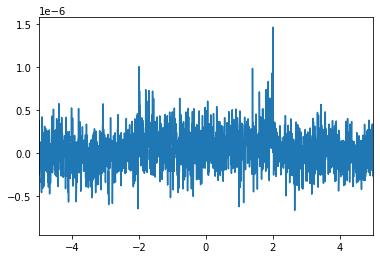

In [31]:
plt.plot(t_nccf, nccf)
plt.xlim([-5, 5])

In [18]:
nccf.shape

(359999,)